# Covariance and Correlation


In probability theory and statistics, the mathematical concepts of covariance and correlation are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

If X and Y are two random variables, with means (expected values) μX and μY and standard deviations σX and σY, respectively, then their covariance and correlation are as follows:

**covariance** 
${\displaystyle {\text{cov}}_{XY}=\sigma _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]}{\displaystyle {\text{cov}}_{XY}=\sigma _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]}$

**correlation**
${\displaystyle {\text{corr}}_{XY}=\rho _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]/(\sigma _{X}\sigma _{Y})}{\displaystyle {\text{corr}}_{XY}=\rho _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]/(\sigma _{X}\sigma _{Y})}$

so that

${\displaystyle \rho _{XY}=\sigma _{XY}/(\sigma _{X}\sigma _{Y})}$
where E is the expected value operator. Notably, correlation is dimensionless while covariance is in units obtained by multiplying the units of the two variables.

If Y always takes on the same values as X, we have the covariance of a variable with itself (i.e. ${\displaystyle \sigma _{XX}}\sigma _{XX})$, which is called the variance and is more commonly denoted as ${\displaystyle \sigma _{X}^{2},}\sigma _{X}^{2}$, the square of the standard deviation. The correlation of a variable with itself is always 1 (except in the degenerate case where the two variances are zero because X always takes on the same single value, in which case the correlation does not exist since its computation would involve division by 0). More generally, the correlation between two variables is 1 (or –1) if one of them always takes on a value that is given exactly by a linear function of the other with respectively a positive (or negative) slope.

Although the values of the theoretical covariances and correlations are linked in the above way, the probability distributions of sample estimates of these quantities are not linked in any simple way and they generally need to be treated separately.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

<Figure size 2160x1080 with 0 Axes>

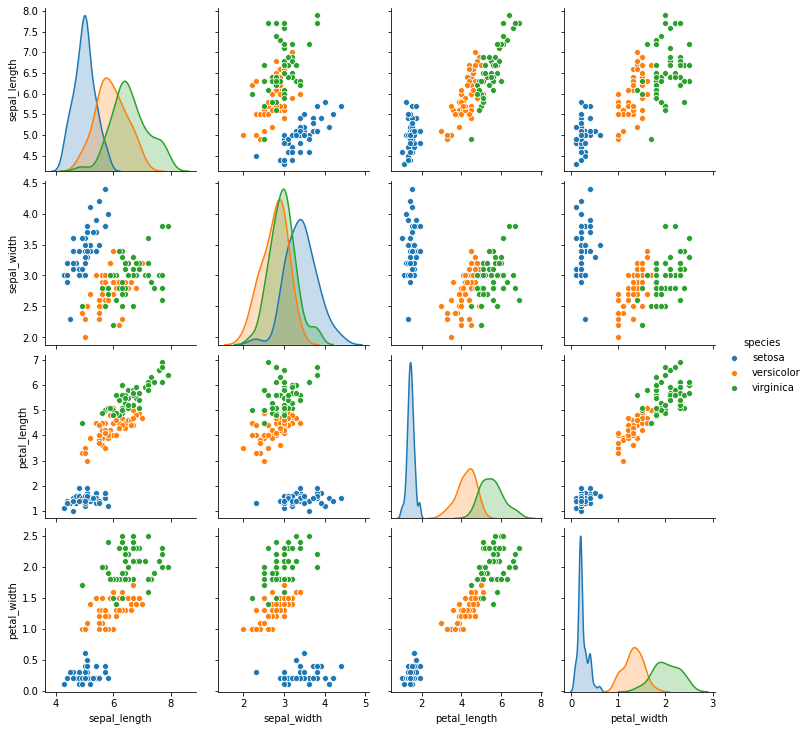

In [4]:
# read dataset
df = pd.read_csv('../datasets/iris/iris.csv')

# create scatterplot matrix
plt.figure(figsize=(30,15))
fig = sns.pairplot(data=df, 
                   hue='species')

plt.show()

In [5]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

## Sample Covariance

- Measures how two variables differ from their mean
- Positive covariance: that the two variables are both above or both below their respective means
- Variables with a positive covariance are positively "correlated" -- they go up or done together
- Negative covariance: valuables from one variable tends to be above the mean and the other below their mean
- In other words, negative covariance means that if one variable goes up, the other variable goes down

$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- Note that similar to variance, the dimension of the covariance is $unit^2$
- Covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

In [6]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2956093959731545

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [7]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## Pearson Correlation Coefficient

- The pearson correlation is "dimensionless" version of the covariance, achieved by dividing by the standard deviation

- Remember, the standard deviation is computed as follows:
        
$$\sigma_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$    

- Pearson correlation:

$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$

$$
= \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$

- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
- $\rho=1$: perfect positive correlation
- $\rho=-1$: perfect negative correlation
- $\rho=0$: no correlation

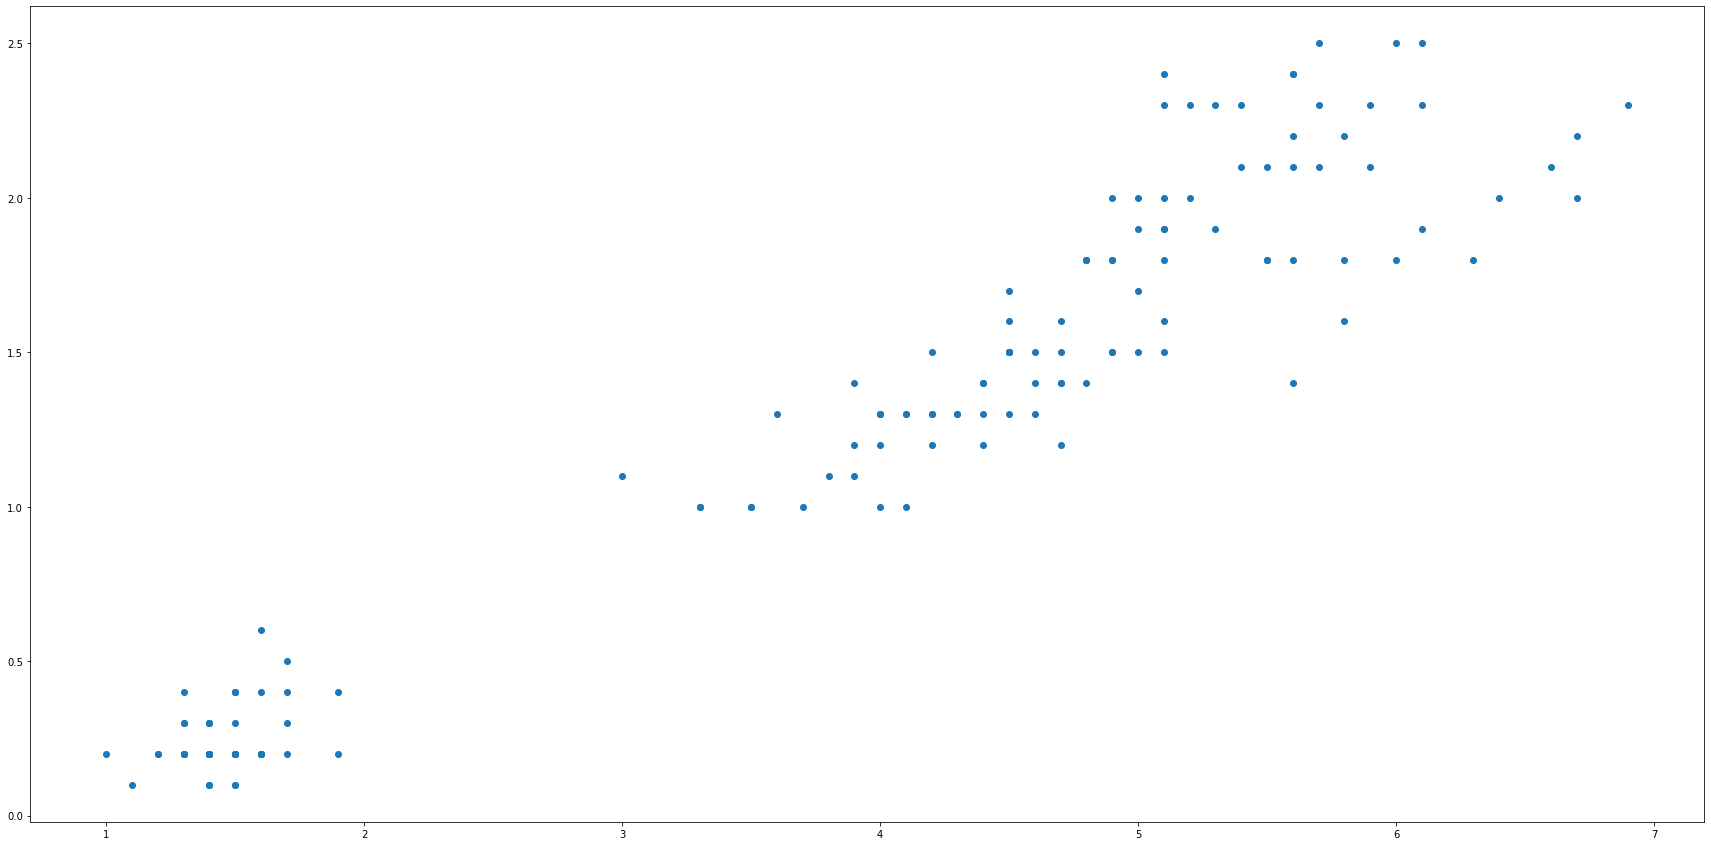

In [10]:
plt.figure(figsize=(30,15))
plt.scatter(X[:, 2], X[:, 3])

In [11]:
(np.cov(X[:, 2:4].T)[0, 1] / 
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

0.9628654314027963

In [12]:
(np.cov(X[:, 2:4].T, ddof=0)[0, 1] / 
 (np.std(X[:, 2], ddof=0) * np.std(X[:, 3], ddof=0)))

0.9628654314027965

In [13]:
np.corrcoef(X[:, 2:4].T)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [14]:
stats.pearsonr(X[:, 2], X[:, 3])

(0.9628654314027963, 4.6750039073255585e-86)

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.  
(https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.pearsonr.html)

## About Scaled Variables

In [15]:
standardized = (X - X.mean()) / X.std()

#### Pearson unaffected

In [16]:
np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [17]:
np.corrcoef(standardized.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

#### Covariance affected

In [18]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [19]:
np.cov(standardized.T)

array([[ 0.17599681, -0.01089153,  0.32707828,  0.13251109],
       [-0.01089153,  0.04876198, -0.08461283, -0.03122115],
       [ 0.32707828, -0.08461283,  0.7998544 ,  0.3325438 ],
       [ 0.13251109, -0.03122115,  0.3325438 ,  0.14912676]])

## Spearman and Kendall-Tau Correlation Coefficients

### Spearman correlation coefficient

* The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables.

* For a sample of size **n**, the n raw scores ${\displaystyle X_{i},Y_{i}}X_{i},Y_{i}$ are converted to ranks ${\displaystyle \operatorname {rg} X_{i},\operatorname {rg} Y_{i}}{\displaystyle \operatorname {rg} X_{i},\operatorname {rg} Y_{i}}$, and ${\displaystyle r_{s}}r_{s}$ is computed as

${\displaystyle r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}},}{\displaystyle r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}},}$
where

* ${\displaystyle \rho }\rho$  denotes the usual Pearson correlation coefficient, but applied to the rank variables,
* ${\displaystyle \operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\displaystyle \operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}$ is the covariance of the rank variables,

* ${\displaystyle \sigma _{\operatorname {rg} _{X}}}{\displaystyle \sigma _{\operatorname {rg} _{X}}} and {\displaystyle \sigma _{\operatorname {rg} _{Y}}}{\displaystyle \sigma _{\operatorname {rg} _{Y}}}$ are the standard deviations of the rank variables.


Only if all n ranks are distinct integers, it can be computed using the popular formula

${\displaystyle r_{s}=1-{\frac {6\sum d_{i}^{2}}{n(n^{2}-1)}},}{\displaystyle r_{s}=1-{\frac {6\sum d_{i}^{2}}{n(n^{2}-1)}},}$
where

${\displaystyle d_{i}=\operatorname {rg} (X_{i})-\operatorname {rg} (Y_{i})}{\displaystyle d_{i}=\operatorname {rg} (X_{i})-\operatorname {rg} (Y_{i})}$ is the difference between the two ranks of each observation,
n is the number of observations.
Identical values are usually[4] each assigned fractional ranks equal to the average of their positions in the ascending order of the values, which is equivalent to averaging over all possible permutations.




In [23]:
# prepare data
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)

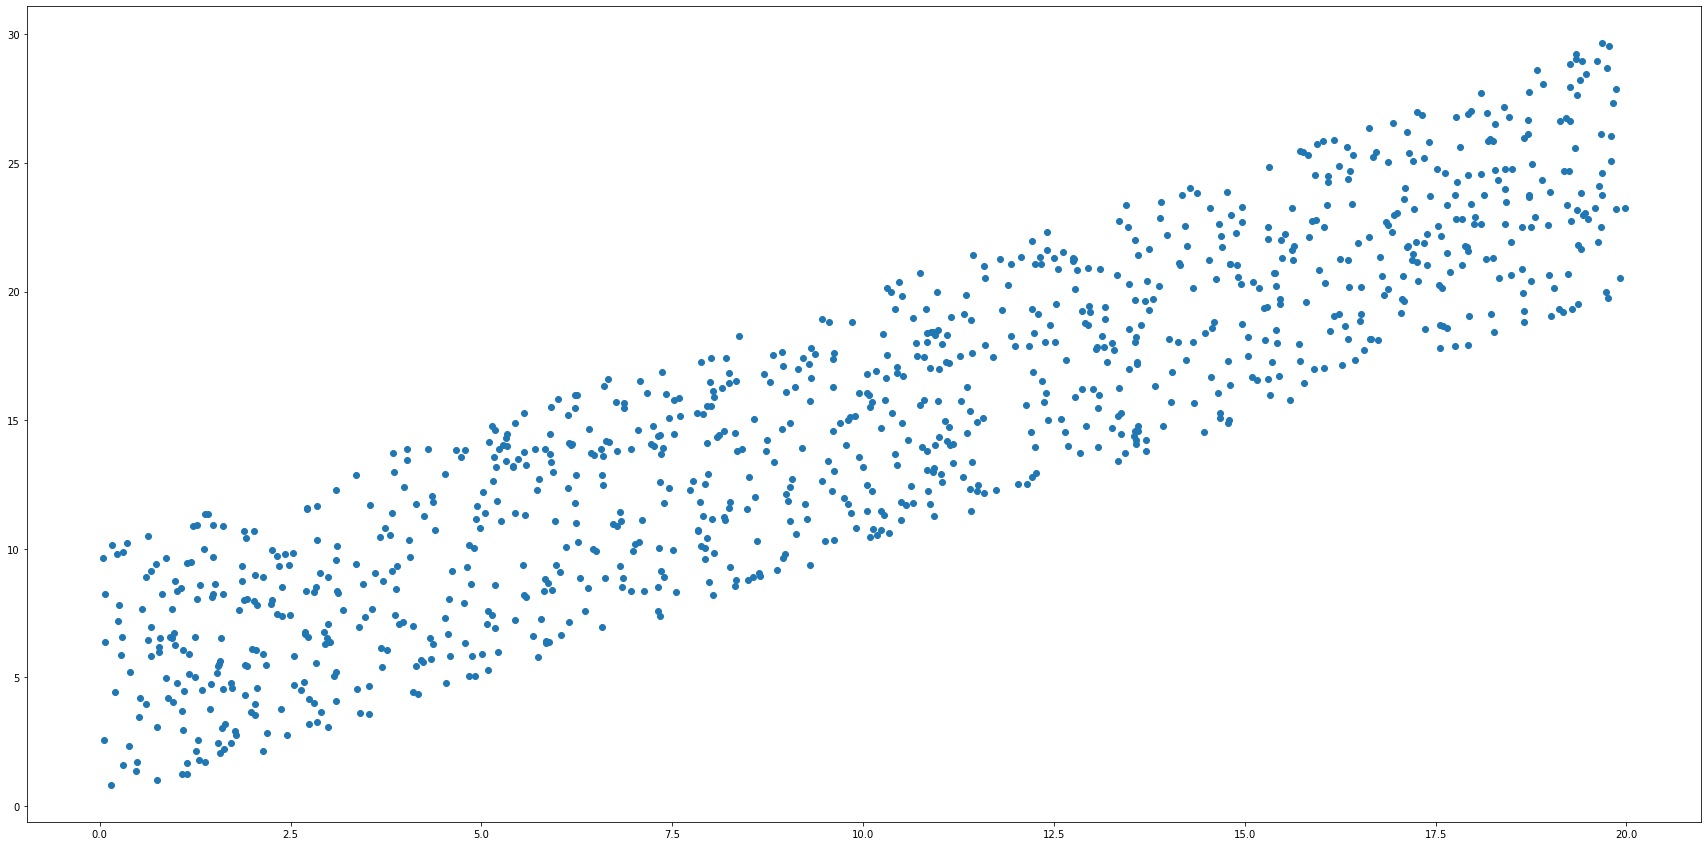

In [30]:
plt.figure(figsize=(30,15))
plt.scatter(data1, data2)
plt.show()

In [35]:
from scipy.stats import spearmanr,kendalltau

In [33]:
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


### Kendall 
- **Effect size:** Cohen’s standard may be used to evaluate the correlation coefficient to determine the strength of the relationship, or the effect size.  Correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association, and coefficients of .50 and above represent a large association or relationship.

- **Continuous data:** Data that is interval or ratio level.  This type of data possesses the properties of magnitude and equal intervals between adjacent units.  Equal intervals between adjacent units means that there are equal amounts of the variable being measured between adjacent units on the scale.  An example would be age.  An increase in age from 21 to 22 would be the same as an increase in age from 60 to 61.

- **Kendall rank correlation:** Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables.  If we consider two samples, a and b, where each sample size is n, we know that the total number of pairings with a b is $n(n-1)/2$.  The following formula is used to calculate the value of Kendall rank correlation:

Let $(x1, y1), (x2, y2), ..., (xn, yn)$ be a set of observations of the joint random variables X and Y respectively, such that all the values of $({\displaystyle x_{i}}x_{i}) and ({\displaystyle y_{i}}y_{i})$ are unique. Any pair of observations ${\displaystyle (x_{i},y_{i})}{\displaystyle (x_{i},y_{i})} and {\displaystyle (x_{j},y_{j})}{\displaystyle (x_{j},y_{j})}$, 

where ${\displaystyle i<j}i<j$, are said to be concordant if the ranks for both elements (more precisely, the sort order by x and by y) agree: that is, if both ${\displaystyle x_{i}>x_{j}}{\displaystyle x_{i}>x_{j}}$ and ${\displaystyle y_{i}>y_{j}}{\displaystyle y_{i}>y_{j}}$; or if both ${\displaystyle x_{i}<x_{j}}{\displaystyle x_{i}<x_{j}}$ and ${\displaystyle y_{i}<y_{j}}{\displaystyle y_{i}<y_{j}}$ They are said to be discordant, if ${\displaystyle x_{i}>x_{j}}{\displaystyle x_{i}>x_{j}}$ and ${\displaystyle y_{i}<y_{j}}{\displaystyle y_{i}<y_{j}}$; or if ${\displaystyle x_{i}<x_{j}}{\displaystyle x_{i}<x_{j}}$ and ${\displaystyle y_{i}>y_{j}}{\displaystyle y_{i}>y_{j}}$. If ${\displaystyle x_{i}=x_{j}}x_{i}=x_{j} or {\displaystyle y_{i}=y_{j}}{\displaystyle y_{i}=y_{j}}$, the pair is neither concordant nor discordant.

The Kendall τ coefficient is defined as:

${\displaystyle \tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{n \choose 2}}.}{\displaystyle \tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{n \choose 2}}}$

* Where ${\displaystyle {n \choose 2}={n(n-1) \over 2}}{\displaystyle {n \choose 2}={n(n-1) \over 2}}$ is the binomial coefficient for the number of ways to choose two items from n items.


* $N_c$= number of concordant
* $N_d$= Number of discordant

In [37]:
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)

In [39]:
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


### Time series analysis
In the case of a time series which is stationary in the wide sense, both the means and variances are constant over time $(E(X_n+m) = E(X_n) = μX$ and $var(X_n+m) = var(X_n)$ and likewise for the variable Y). 


In this case the cross-covariance and cross-correlation are functions of the time difference:

1. **cross-covariance**
${\displaystyle \sigma _{XY}(m)=E[(X_{n}-\mu _{X})\,(Y_{n+m}-\mu _{Y})],}{\displaystyle \sigma _{XY}(m)=E[(X_{n}-\mu _{X})\,(Y_{n+m}-\mu _{Y})],}$

2. **cross-correlation** 
${\displaystyle \rho _{XY}(m)=E[(X_{n}-\mu _{X})\,(Y_{n+m}-\mu _{Y})]/(\sigma _{X}\sigma _{Y}).}{\displaystyle \rho _{XY}(m)=E[(X_{n}-\mu _{X})\,(Y_{n+m}-\mu _{Y})]/(\sigma _{X}\sigma _{Y}).}$

If Y is the same variable as X, the above expressions are called the autocovariance and autocorrelation:

3. **autocovariance**
${\displaystyle \sigma _{XX}(m)=E[(X_{n}-\mu _{X})\,(X_{n+m}-\mu _{X})],}{\displaystyle \sigma _{XX}(m)=E[(X_{n}-\mu _{X})\,(X_{n+m}-\mu _{X})],}$
4. **autocorrelation**
${\displaystyle \rho _{XX}(m)=E[(X_{n}-\mu _{X})\,(X_{n+m}-\mu _{X})]/(\sigma _{X}^{2}).}{\displaystyle \rho _{XX}(m)=E[(X_{n}-\mu _{X})\,(X_{n+m}-\mu _{X})]/(\sigma _{X}^{2}).}$

In [42]:
## Cross-covariance function
X = np.array([-2.1, -1. ,  4.3])
Y = np.array([ 3.  ,  1.1 ,  0.12])

In [44]:
np.cov(X,Y)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [45]:
XY = np.concatenate((X[None, :], Y[None, :]))

In [47]:
np.cov(XY)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [48]:
((X-X.mean()) * (Y-Y.mean())).sum()/ (3-1)

-4.2860000000000005

In [49]:
## cross-correlation
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

<Figure size 2160x1080 with 0 Axes>

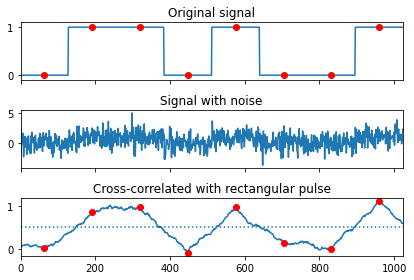

In [51]:
clock = np.arange(64, len(sig), 128)
plt.figure(figsize=(30,15))
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()

In [54]:
Xi = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
N = np.size(Xi)
k = 5
Xs = np.average(Xi)

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

print("Autocovariance:", autocovariance(Xi, N, k, Xs))

Autocovariance: 1.4285714285714284


In [55]:
# Time series data

data = np.array([24.40,10.25,20.05,22.00,16.90,7.80,15.00,22.80,34.90,13.30])

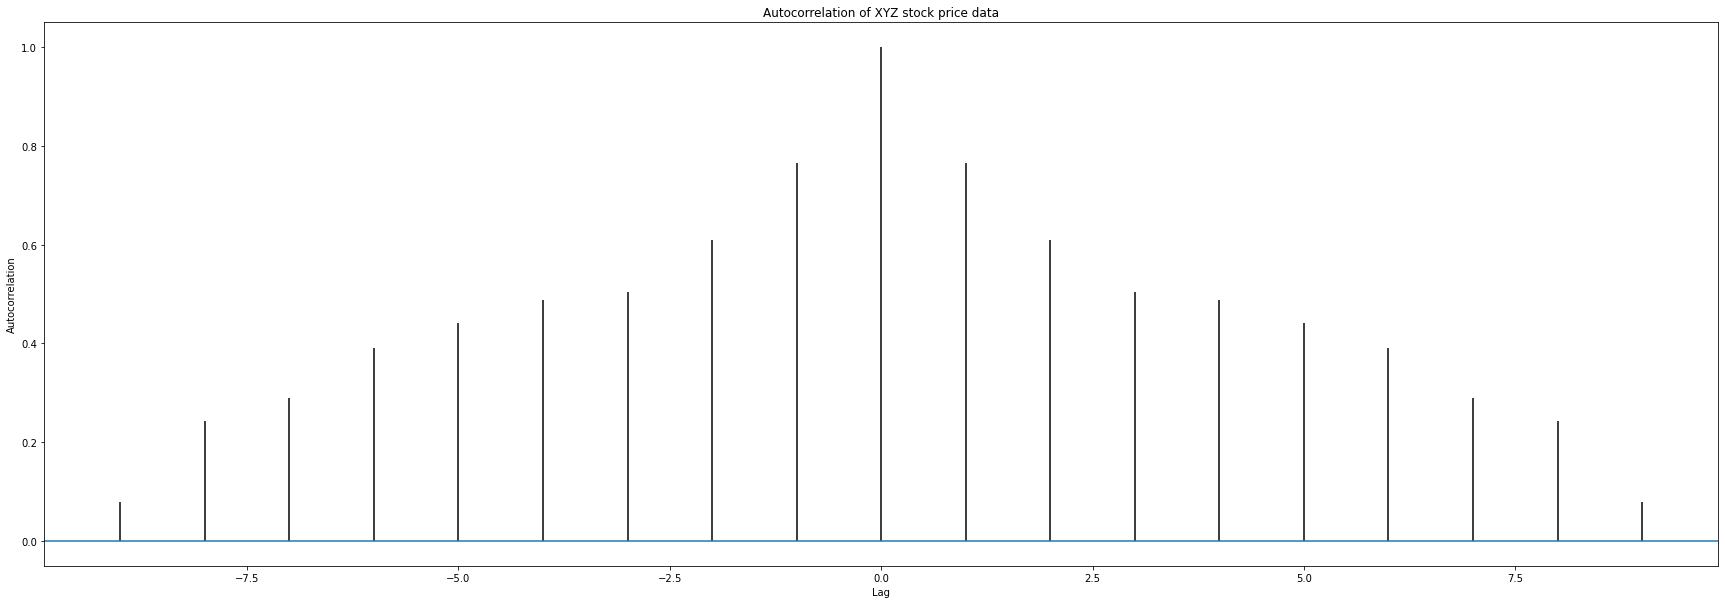

In [57]:
# Plot autocorrelation
plt.figure(figsize=(30,10))
plt.acorr(data, maxlags=9)

# Add labels to autocorrelation plot
plt.title('Autocorrelation of XYZ stock price data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
# Display the autocorrelation plot
plt.show()